# Installations and Import

In [1]:
!pip install lexrank transformers nltk
!pip install rouge

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
# For data processing
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import os
from glob import glob
from tqdm import tqdm, tqdm_notebook

import gc

import warnings
warnings.filterwarnings("ignore")


In [3]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, AutoModelWithLMHead
import torch
import time

In [4]:
import transformers
print(transformers.__version__)

4.37.0


# Preprocessing of data

In [5]:
root_dir = 'BBCNewSummary/BBC News Summary/News Articles'
sum_dir = 'BBCNewSummary/BBC News Summary/Summaries'

print(os.listdir(root_dir))
print(os.listdir(sum_dir))

['entertainment', 'politics', 'sport', 'business', 'tech']
['entertainment', 'politics', 'sport', 'business', 'tech']


In [6]:
unique_category = os.listdir(root_dir)

# List to store the category names
news_summary_list = []

# List to store the news articles
news_article_list = []

# Iterate through unique category
for category in tqdm(unique_category, colour='yellow'):
    # Get the absolute path of that category directory
    abs_category_path = root_dir + "/" + category
    
    # Create a query to get the absolute path of all the .txt files
    query = abs_category_path + "/*.txt"
    
    # Get the list of absolute path of all the files
    file_paths = glob(query)
    
    # Iterate through all the .txt files path
    for file_path in file_paths:
        
        try:
            # Open the file
            f = open(file_path, 'r')
            # Read the file contents
            news_article = f.read()
            # Close the file
            f.close()
        except:
            # Open the file
            f = open(file_path, 'rb')
            # Read the file contents
            news_article = f.read()
            # Close the file
            f.close()
            
        # Append new articles and category to respective list
        news_article_list.append(news_article)
        
# Print length of news articles and categories
print("Total Articles: ", len(news_article_list))

# Print a sample article
print("Sample Article: ")
print(news_article_list[0])

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 91.12it/s]

Total Articles:  2225
Sample Article: 
Dame Julie pops in to see Poppins

Mary Poppins star Dame Julie Andrews watched the hit stage version of her classic film at a charity performance in London's West End.

It was the first time Dame Julie, who shot to fame as the nanny in the 1964 Disney movie, had seen the musical, staged at the Prince Edward Theatre. She watched Laura Michelle Kelly, 23, reprise the role on stage. The show has been one of the West End's hottest tickets since opening in December, winning two Olivier Awards. Kelly was named best musical actress at last month's ceremony and the musical also won best choreography.

But Kelly said she was "very nervous" about meeting Dame Julie because she was "my absolute hero". The gala performance saw Dame Julie, 69, return to the theatre where she had her first starring role in a performance of Humpty Dumpty in 1948. The Mary Poppins musical has been masterminded by theatre impresario Sir Cameron Mackintosh and directed by Richard 

In [7]:
news_article_list[1254] = 'Chelsea sack Mutu\n\nChelsea have sacked Adrian Mutu after he failed a drugs test.\n\nThe 25-year-old tested positive for a banned substance - which he later denied was cocaine - in October. Chelsea have decided to write off a possible transfer fee for Mutu, a \xa315.8m signing from Parma last season, who may face a two-year suspension. A statement from Chelsea explaining the decision read:"We want to make clear that Chelsea has a zero tolerance policy towards drugs." Mutu scored six goals in his first five games after arriving at Stamford Bridge but his form went into decline and he was frozen out by coach Jose Mourinho. Chelsea\'s statement added: "This applies to both performance-enhancing drugs or so-called \'recreational\' drugs. They have no place at our club or in sport. "In coming to a decision on this case, Chelsea believed the club\'s social responsibility to its fans, players, employees and other stakeholders in football regarding drugs was more important than the major financial considerations to the company. "Any player who takes drugs breaches his contract with the club as well as Football Association rules. "The club totally supports the FA in strong action on all drugs cases." Fifa\'s disciplinary code stipulates that a first doping offence should be followed by a six-month ban. And the sport\'s world governing body has re-iterated their stance over Mutu\'s failed drugs test, maintaining it is a matter for the domestic sporting authorities. "Fifa is not in a position to make any comment on the matter until the English FA have informed us of their disciplinary decision and the relevant information associated with it," said a Fifa spokesman. Chelsea\'s move won backing from drug-testing expert Michelle Verroken. Verroken, a former director of drug-free sport for UK Sport, insists the Blues were right to sack Mutu and have enhanced their reputation by doing so. "Chelsea are saying quite clearly to the rest of their players and their fans that this is a situation they are not prepared to tolerate. "It was a very difficult decision for them and an expensive decision for them but the terms of his contract were breached and it was the only decision they could make. "It is a very clear stance by Chelsea and it has given a strong boost to the reputation of the club." It emerged that Mutu had failed a drugs test on October 18 and, although it was initially reported that the banned substance in question was cocaine. The Romanian international later suggested it was a substance designed to enhance sexual performance. The Football Association has yet to act on Mutu\'s failed drugs test and refuses to discuss his case.\n'

In [8]:
sum_dir = 'BBCNewSummary/BBC News Summary/Summaries'


In [9]:
unique_category = os.listdir(sum_dir)

# List to store the category names
news_summary_list = []


# Iterate through unique category
for category in tqdm(unique_category, colour='yellow'):
    # Get the absolute path of that category directory
    abs_category_path = sum_dir + "/" + category
    
    # Create a query to get the absolute path of all the .txt files
    query = abs_category_path + "/*.txt"
    
    # Get the list of absolute path of all the files
    file_paths = glob(query)
    
    # Iterate through all the .txt files path
    for file_path in file_paths:
        
        try:
            # Open the file
            f = open(file_path, 'r')
            # Read the file contents
            news_summary = f.read()
            # Close the file
            f.close()
        except:
            # Open the file
            f = open(file_path, 'rb')
            # Read the file contents
            news_summary = f.read()
            # Close the file
            f.close()
            
        # Append new articles and category to respective list
        news_summary_list.append(news_summary)
        
# Print length of news articles and categories
print("Total Articles: ", len(news_article_list))
print("Total summaries: ", len(news_summary_list), end='\n\n')

# Print a sample article
print("Sample Article: ")
print(news_article_list[0])

# Print a sample article
print("Sample summary: ")
print(news_summary_list[0])

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 99.91it/s]

Total Articles:  2225
Total summaries:  2225

Sample Article: 
Dame Julie pops in to see Poppins

Mary Poppins star Dame Julie Andrews watched the hit stage version of her classic film at a charity performance in London's West End.

It was the first time Dame Julie, who shot to fame as the nanny in the 1964 Disney movie, had seen the musical, staged at the Prince Edward Theatre. She watched Laura Michelle Kelly, 23, reprise the role on stage. The show has been one of the West End's hottest tickets since opening in December, winning two Olivier Awards. Kelly was named best musical actress at last month's ceremony and the musical also won best choreography.

But Kelly said she was "very nervous" about meeting Dame Julie because she was "my absolute hero". The gala performance saw Dame Julie, 69, return to the theatre where she had her first starring role in a performance of Humpty Dumpty in 1948. The Mary Poppins musical has been masterminded by theatre impresario Sir Cameron Mackintosh 

In [10]:
for index, article in enumerate(news_article_list):
    if not isinstance(article, str):
        print(f"article {index} is not of type str")
        
for index, article in enumerate(news_summary_list):
    if not isinstance(article, str):
        print(f"article {index} is not of type str")

# BERT Model


In [22]:
model = AutoModelWithLMHead.from_pretrained('bert-base-cased')
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

config.json: 100%|█████████████████████████████| 570/570 [00:00<00:00, 2.16MB/s]
model.safetensors: 100%|█████████████████████| 436M/436M [00:56<00:00, 7.65MB/s]
Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
tokenizer_config.json: 100%|█████████████████| 29.0/29.0 [00:00<00:00, 93.6kB/s]
vocab.txt: 100%|██████████████████████████████| 213k/213k [00:00<00:00, 

In [24]:
start = time.time()
inputs = tokenizer.encode("summarize: " + news_article_list[0], return_tensors="pt", max_length=100)
outputs = model.generate(inputs, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
decoded_BERT = tokenizer.decode(outputs[0])
end = time.time()
BERT_time = (end-start)
print(BERT_time)
print("BERT Summary is :", decoded_BERT)


21.65673017501831
BERT Summary is : [CLS] summarize : Dame Julie pops in to see Poppins Mary Poppins star Dame Julie Andrews watched the hit stage version of her classic film at a charity performance in London's West End. It was the first time Dame Julie, who shot to fame as the nanny in the 1964 Disney movie, had seen the musical, staged at the Prince Edward Theatre. She watched Laura Michelle Kelly, 23, reprise the role on stage. The show has been one of the [SEP] best known and the best known and the oldest of the musicals, Mary and Mary. The original. The original. The original Andrews. The original. Andrews and Julie Andrews. - - - - - - - - - - - - - - -


# Lexrank

In [77]:
import nltk
nltk.download('punkt')

from nltk.tokenize import sent_tokenize
from lexrank import STOPWORDS, LexRank


[nltk_data] Downloading package punkt to /home/chinois/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [79]:
sentences = sent_tokenize(news_article_list[0])
documents = []
start = time.time()
for article in tqdm(news_article_list) :
    documents.append(sent_tokenize(article))
lxr = LexRank(documents)
summary_cont = lxr.get_summary(sentences, threshold=None)
end = time.time()

print(end-start)

100%|█████████████████████████████████████| 2225/2225 [00:00<00:00, 2999.32it/s]


23.22557520866394


In [ ]:
lxr_summary = []
lxr_times = []
for article in tqdm(news_article_list[:500]):
    start = time.time()
    sentences = sent_tokenize(article)
    summary_sentences = lxr.get_summary(sentences, summary_size= 4,threshold=0.03)
    summary = ''.join(summary_sentences)
    lxr_summary.append(summary)
    end = time.time()
    lxr_times.append(end-start)
print(lxr_summary[0])
print(lxr_times[0])

In [70]:
# Specify the file name
file_name = 'lxr_summaries.pkl'

# Open the file in binary write mode
with open(file_name, 'wb') as file:
    # Use pickle.dump to save the list to the file
    pickle.dump(lxr_summary, file)

print(f'The list has been saved to {file_name}')

The list has been saved to lxr_summaries.pkl


In [72]:
# Specify the file name
file_name = 'lxr_times.pkl'

# Open the file in binary write mode
with open(file_name, 'wb') as file:
    # Use pickle.dump to save the list to the file
    pickle.dump(lxr_times, file)

print(f'The list has been saved to {file_name}')

The list has been saved to lxr_times.pkl


# GPT2

In [25]:
model = AutoModelWithLMHead.from_pretrained('gpt2')
tokenizer = AutoTokenizer.from_pretrained("gpt2")


config.json: 100%|█████████████████████████████| 665/665 [00:00<00:00, 2.12MB/s]
model.safetensors: 100%|█████████████████████| 548M/548M [01:07<00:00, 8.10MB/s]
generation_config.json: 100%|███████████████████| 124/124 [00:00<00:00, 991kB/s]
vocab.json: 100%|██████████████████████████| 1.04M/1.04M [00:00<00:00, 1.50MB/s]
merges.txt: 100%|█████████████████████████████| 456k/456k [00:00<00:00, 648kB/s]
tokenizer.json: 100%|██████████████████████| 1.36M/1.36M [00:00<00:00, 1.56MB/s]


In [73]:
GPT2_times = []
GPT2_summary = []
for article in tqdm(news_article_list[:500]):
    start = time.time()
    inputs = tokenizer.encode("summarize: " + article, return_tensors="pt", max_length=149)
    # add attention mask here
    
    outputs = model.generate(inputs, pad_token_id=tokenizer.eos_token_id, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
    decoded_GPT2 = tokenizer.decode(outputs[0])
    GPT2_summary.append(decoded_GPT2)
    end = time.time()
    GPT2_times.append(end-start)
print(GPT2_summary[0], '\n', len(GPT2_summary))

100%|█████████████████████████████████████████| 500/500 [06:19<00:00,  1.32it/s]

summarize: Dame Julie pops in to see Poppins

Mary Poppins star Dame Julie Andrews watched the hit stage version of her classic film at a charity performance in London's West End.

It was the first time Dame Julie, who shot to fame as the nanny in the 1964 Disney movie, had seen the musical, staged at the Prince Edward Theatre. She watched Laura Michelle Kelly, 23, reprise the role on stage. The show has been one of the West End's hottest tickets since opening in December, winning two Olivier Awards. Kelly was named best musical actress at last month's ceremony and the musical also won best choreography.

But Kelly said she was "very nervous" about meeting Dame Julie 
 500


In [74]:
import pickle

# Specify the file name
file_name = 'GPT2_summaries.pkl'

# Open the file in binary write mode
with open(file_name, 'wb') as file:
    # Use pickle.dump to save the list to the file
    pickle.dump(GPT2_summary, file)

print(f'The list has been saved to {file_name}')


The list has been saved to GPT2_summaries.pkl


In [75]:
import pickle

# Specify the file name
file_name = 'GPT2_times.pkl'

# Open the file in binary write mode
with open(file_name, 'wb') as file:
    # Use pickle.dump to save the list to the file
    pickle.dump(GPT2_times, file)

print(f'The list has been saved to {file_name}')


The list has been saved to GPT2_times.pkl


# GPT3

In [116]:
model = AutoModelWithLMHead.from_pretrained('openai-gpt')
tokenizer = AutoTokenizer.from_pretrained("openai-gpt")

model.safetensors: 100%|█████████████████████| 479M/479M [01:02<00:00, 7.61MB/s]
generation_config.json: 100%|█████████████████| 74.0/74.0 [00:00<00:00, 260kB/s]
vocab.json: 100%|████████████████████████████| 816k/816k [00:00<00:00, 1.44MB/s]
merges.txt: 100%|████████████████████████████| 458k/458k [00:00<00:00, 1.07MB/s]
tokenizer.json: 100%|██████████████████████| 1.27M/1.27M [00:00<00:00, 7.11MB/s]


In [117]:
GPT3_times = []
GPT3_summary = []
for article in tqdm(news_article_list[:500]):
    start = time.time()
    inputs = tokenizer.encode("summarize: " + article, return_tensors="pt", max_length=149)
    # add attention mask here
    
    outputs = model.generate(inputs, pad_token_id=tokenizer.eos_token_id, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
    decoded_GPT3 = tokenizer.decode(outputs[0])
    GPT3_summary.append(decoded_GPT3)
    end = time.time()
    GPT3_times.append(end-start)
print(GPT3_summary[0], '\n', len(GPT3_summary))

100%|█████████████████████████████████████████| 500/500 [05:33<00:00,  1.50it/s]

summarize : dame julie pops in to see poppins mary poppins star dame julie andrews watched the hit stage version of her classic film at a charity performance in london's west end. it was the first time dame julie, who shot to fame as the nanny in the 1964 disney movie, had seen the musical, staged at the prince edward theatre. she watched laura michelle kelly, 23, reprise the role on stage. the show has been one of the west end's hottest tickets since opening in december, winning two olivier awards. kelly was named best musical actress at last month's ceremony and the musical also won best choreography. but kelly said she was " very nervous " about meeting dame julie because she was " my " 
 500


In [128]:
print(GPT3_summary[23], '\n\n', lxr_summary[23], '\n\n\n', news_summary_list[23] )

summarize : jungle tv show ratings drop by 4m the finale of itv1's i'm a celebrity... get me out of here drew an average of 10. 9m viewers - about four million fewer than the previous series. the fourth series of the show peaked on monday at 11. 9m and 49. 2 % of the audience, just before joe pasquale won. this compared with a peak of 15. 3m at and a record 62. 2 % of the tv audience when kerry mcfadden won in february. comic pasquale beat former royal butler paul burrell who came second, nightclub owner fran cosgrave, who was third. pasquale follows kerry mcfadden, phil mc 

 The fourth series of the show peaked on Monday at 11.9m and 49.2% of the audience, just before Joe Pasquale won.Pasquale follows Kerry McFadden, Phil Tufnell and Tony Blackburn as winners of the show.Singer and TV presenter McFadden was the show's first female winner.This compared with a peak of 15.3m at and a record 62.2% of the TV audience when Kerry McFadden won in February. 


 Pasquale follows Kerry McFadden

In [118]:
import pickle

# Specify the file name
file_name = 'GPT3_summaries.pkl'

# Open the file in binary write mode
with open(file_name, 'wb') as file:
    # Use pickle.dump to save the list to the file
    pickle.dump(GPT3_summary, file)

print(f'The list has been saved to {file_name}')

The list has been saved to GPT3_summaries.pkl


In [119]:
import pickle

# Specify the file name
file_name = 'GPT3_times.pkl'

# Open the file in binary write mode
with open(file_name, 'wb') as file:
    # Use pickle.dump to save the list to the file
    pickle.dump(GPT3_times, file)

print(f'The list has been saved to {file_name}')


The list has been saved to GPT3_times.pkl


# Analysis - ROUGE

In [11]:
!pip install rouge


Defaulting to user installation because normal site-packages is not writeable


In [12]:
import statistics

In [13]:
import pickle

def get_list(name):
    # Open the file in binary read mode
    with open(name, 'rb') as file:
        # Use pickle.load to load the list from the file
        my_list = pickle.load(file)

        # Now, 'my_list' contains the data loaded from the pickle file
    return my_list

lxr_summary, GPT2_summary, GPT3_summary = get_list('lxr_summaries.pkl'), get_list('GPT2_summaries.pkl'), get_list('GPT3_summaries.pkl')


In [52]:
from rouge import Rouge

# Calculate ROUGE scores for each pair of system and reference summaries
def calculate_rouge(system_summary, reference_summary):
    evaluator = Rouge()
    scores = evaluator.get_scores(system_summary, reference_summary)
    return scores

In [53]:
scores_lxr = {'rouge-1': {'r': [], 'p': [], 'f': []}, 'rouge-2': {'r': [], 'p': [], 'f': []}, 'rouge-l': {'r': [], 'p': [], 'f': []}}
scores_gpt2= {'rouge-1': {'r': [], 'p': [], 'f': []}, 'rouge-2': {'r': [], 'p': [], 'f': []}, 'rouge-l': {'r': [], 'p': [], 'f': []}}
scores_gpt3= {'rouge-1': {'r': [], 'p': [], 'f': []}, 'rouge-2': {'r': [], 'p': [], 'f': []}, 'rouge-l': {'r': [], 'p': [], 'f': []}}

for index, summary in tqdm(enumerate(news_summary_list[:500])):
    score_lxr = calculate_rouge(lxr_summary[index], summary)
    score_gpt2 = calculate_rouge(GPT2_summary[index], summary)
    score_gpt3 = calculate_rouge(GPT3_summary[index], summary)

    scores_lxr['rouge-1']['r'].append(score_lxr[0]['rouge-1']['r'])
    scores_lxr['rouge-1']['p'].append(score_lxr[0]['rouge-1']['p'])
    scores_lxr['rouge-1']['f'].append(score_lxr[0]['rouge-1']['f'])
    
    scores_lxr['rouge-2']['r'].append(score_lxr[0]['rouge-2']['r'])
    scores_lxr['rouge-2']['p'].append(score_lxr[0]['rouge-2']['p'])
    scores_lxr['rouge-2']['f'].append(score_lxr[0]['rouge-2']['f'])

    scores_lxr['rouge-l']['r'].append(score_lxr[0]['rouge-l']['r'])
    scores_lxr['rouge-l']['p'].append(score_lxr[0]['rouge-l']['p'])
    scores_lxr['rouge-l']['f'].append(score_lxr[0]['rouge-l']['f'])
    
    scores_gpt2['rouge-1']['r'].append(score_gpt2[0]['rouge-1']['r'])
    scores_gpt2['rouge-1']['p'].append(score_gpt2[0]['rouge-1']['p'])
    scores_gpt2['rouge-1']['f'].append(score_gpt2[0]['rouge-1']['f'])
    
    scores_gpt2['rouge-2']['r'].append(score_gpt2[0]['rouge-2']['r'])
    scores_gpt2['rouge-2']['p'].append(score_gpt2[0]['rouge-2']['p'])
    scores_gpt2['rouge-2']['f'].append(score_gpt2[0]['rouge-2']['f'])

    scores_gpt2['rouge-l']['r'].append(score_gpt2[0]['rouge-l']['r'])
    scores_gpt2['rouge-l']['p'].append(score_gpt2[0]['rouge-l']['p'])
    scores_gpt2['rouge-l']['f'].append(score_gpt2[0]['rouge-l']['f'])
    
    scores_gpt3['rouge-1']['r'].append(score_gpt3[0]['rouge-1']['r'])
    scores_gpt3['rouge-1']['p'].append(score_gpt3[0]['rouge-1']['p'])
    scores_gpt3['rouge-1']['f'].append(score_gpt3[0]['rouge-1']['f'])
    
    scores_gpt3['rouge-2']['r'].append(score_gpt3[0]['rouge-2']['r'])
    scores_gpt3['rouge-2']['p'].append(score_gpt3[0]['rouge-2']['p'])
    scores_gpt3['rouge-2']['f'].append(score_gpt3[0]['rouge-2']['f'])

    scores_gpt3['rouge-l']['r'].append(score_gpt3[0]['rouge-l']['r'])
    scores_gpt3['rouge-l']['p'].append(score_gpt3[0]['rouge-l']['p'])
    scores_gpt3['rouge-l']['f'].append(score_gpt3[0]['rouge-l']['f'])


    

500it [00:14, 33.83it/s]


In [54]:
mean_lxr = {'rouge-1': {'r': 0, 'p': 0, 'f': 0}, 'rouge-2': {'r': 0, 'p': 0, 'f': 0}, 'rouge-l': {'r': 0, 'p': 0, 'f': 0}}

mean_lxr['rouge-1']['r'] = statistics.mean(scores_lxr['rouge-1']['r'])
mean_lxr['rouge-1']['p'] = statistics.mean(scores_lxr['rouge-1']['p'])
mean_lxr['rouge-1']['f'] = statistics.mean(scores_lxr['rouge-1']['f'])

mean_lxr['rouge-2']['r'] = statistics.mean(scores_lxr['rouge-2']['r'])
mean_lxr['rouge-2']['p'] = statistics.mean(scores_lxr['rouge-2']['p'])
mean_lxr['rouge-2']['f'] = statistics.mean(scores_lxr['rouge-2']['f'])

mean_lxr['rouge-l']['r'] = statistics.mean(scores_lxr['rouge-l']['r'])
mean_lxr['rouge-l']['p'] = statistics.mean(scores_lxr['rouge-l']['p'])
mean_lxr['rouge-l']['f'] = statistics.mean(scores_lxr['rouge-l']['f'])

In [55]:
print(mean_lxr)

{'rouge-1': {'r': 0.6107972692044713, 'p': 0.8238786162795455, 'f': 0.6840108870883583}, 'rouge-2': {'r': 0.5268438948314309, 'p': 0.7534332969080533, 'f': 0.5996313604072603}, 'rouge-l': {'r': 0.6072604559772664, 'p': 0.8191853272599362, 'f': 0.6800707724860748}}


In [56]:
mean_gpt2 = {'rouge-1': {'r': 0, 'p': 0, 'f': 0}, 'rouge-2': {'r': 0, 'p': 0, 'f': 0}, 'rouge-l': {'r': 0, 'p': 0, 'f': 0}}

mean_gpt2['rouge-1']['r'] = statistics.mean(scores_gpt2['rouge-1']['r'])
mean_gpt2['rouge-1']['p'] = statistics.mean(scores_gpt2['rouge-1']['p'])
mean_gpt2['rouge-1']['f'] = statistics.mean(scores_gpt2['rouge-1']['f'])

mean_gpt2['rouge-2']['r'] = statistics.mean(scores_gpt2['rouge-2']['r'])
mean_gpt2['rouge-2']['p'] = statistics.mean(scores_gpt2['rouge-2']['p'])
mean_gpt2['rouge-2']['f'] = statistics.mean(scores_gpt2['rouge-2']['f'])

mean_gpt2['rouge-l']['r'] = statistics.mean(scores_gpt2['rouge-l']['r'])
mean_gpt2['rouge-l']['p'] = statistics.mean(scores_gpt2['rouge-l']['p'])
mean_gpt2['rouge-l']['f'] = statistics.mean(scores_gpt2['rouge-l']['f'])

In [57]:
print(mean_gpt2)

{'rouge-1': {'r': 0.5525849263101736, 'p': 0.6161347627325594, 'f': 0.5663228114118829}, 'rouge-2': {'r': 0.44017984158774576, 'p': 0.5046489694000454, 'f': 0.45265583251220737}, 'rouge-l': {'r': 0.5442476651455688, 'p': 0.6062617095442804, 'f': 0.5575414522170741}}


In [58]:
mean_gpt3 = {'rouge-1': {'r': 0, 'p': 0, 'f': 0}, 'rouge-2': {'r': 0, 'p': 0, 'f': 0}, 'rouge-l': {'r': 0, 'p': 0, 'f': 0}}

mean_gpt3['rouge-1']['r'] = statistics.mean(scores_gpt3['rouge-1']['r'])
mean_gpt3['rouge-1']['p'] = statistics.mean(scores_gpt3['rouge-1']['p'])
mean_gpt3['rouge-1']['f'] = statistics.mean(scores_gpt3['rouge-1']['f'])

mean_gpt3['rouge-2']['r'] = statistics.mean(scores_gpt3['rouge-2']['r'])
mean_gpt3['rouge-2']['p'] = statistics.mean(scores_gpt3['rouge-2']['p'])
mean_gpt2['rouge-2']['f'] = statistics.mean(scores_gpt3['rouge-2']['f'])

mean_gpt3['rouge-l']['r'] = statistics.mean(scores_gpt3['rouge-l']['r'])
mean_gpt3['rouge-l']['p'] = statistics.mean(scores_gpt3['rouge-l']['p'])
mean_gpt3['rouge-l']['f'] = statistics.mean(scores_gpt3['rouge-l']['f'])

In [59]:
print(mean_gpt3)

{'rouge-1': {'r': 0.41564263750294234, 'p': 0.45761326610680136, 'f': 0.4227809545220793}, 'rouge-2': {'r': 0.2825019378032273, 'p': 0.3074974800063765, 'f': 0}, 'rouge-l': {'r': 0.40736724571917415, 'p': 0.44770043407925614, 'f': 0.4140453154899936}}


In [60]:
# Create a DataFrame from the dictionaries
df = pd.DataFrame([mean_lxr['rouge-1'], mean_gpt2['rouge-1'], mean_gpt3['rouge-1']])

# Display the DataFrame
print(df)


          r         p         f
0  0.610797  0.823879  0.684011
1  0.552585  0.616135  0.566323
2  0.415643  0.457613  0.422781


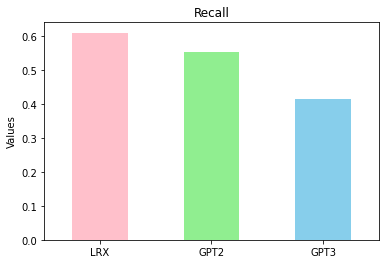

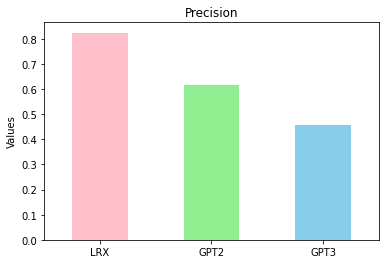

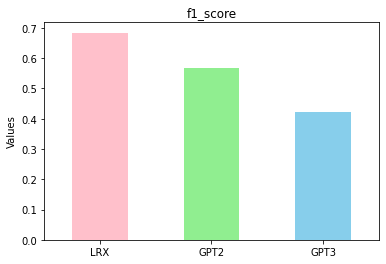

In [61]:
df['dictionary'] = ['LRX', 'GPT2', 'GPT3']
# Melt the DataFrame to reshape it for plotting
df_melted = pd.melt(df, id_vars=['dictionary'], value_vars=df.columns[:-1], var_name='key', value_name='value')
k = {'r':'Recall', 'p':'Precision', 'f':'f1_score'}

# Iterate through unique keys and plot for each key
for key in df_melted['key'].unique():
    key_df = df_melted[df_melted['key'] == key]
    
    title = k[key]
    key_df.plot(kind='bar', x='dictionary', y='value', rot=0, legend=False, color=['pink', 'lightgreen', 'skyblue'])
    # Set labels and title
    plt.xlabel('')
    plt.ylabel('Values')
    plt.title(f'{title}')
    
    # Display the plot
    plt.show()


In [62]:
gpt3_tot, gpt2_tot, lxr_tot = {}, {}, {}
gpt3_tot['r'] = (mean_gpt3['rouge-1']['r']+mean_gpt3['rouge-2']['r']+mean_gpt3['rouge-l']['r'])/3
gpt3_tot['p'] = (mean_gpt3['rouge-1']['p']+mean_gpt3['rouge-2']['p']+mean_gpt3['rouge-l']['p'])/3
gpt3_tot['f'] = (mean_gpt3['rouge-1']['f']+mean_gpt3['rouge-2']['f']+mean_gpt3['rouge-l']['f'])/3

gpt2_tot['r'] = (mean_gpt2['rouge-1']['r']+mean_gpt2['rouge-2']['r']+mean_gpt2['rouge-l']['r'])/3
gpt2_tot['p'] = (mean_gpt2['rouge-1']['p']+mean_gpt2['rouge-2']['p']+mean_gpt2['rouge-l']['p'])/3
gpt2_tot['f'] = (mean_gpt2['rouge-1']['f']+mean_gpt2['rouge-2']['f']+mean_gpt2['rouge-l']['f'])/3

lxr_tot['r'] = (mean_lxr['rouge-1']['r']+mean_lxr['rouge-2']['r']+mean_lxr['rouge-l']['r'])/3
lxr_tot['p'] = (mean_lxr['rouge-1']['p']+mean_lxr['rouge-2']['p']+mean_lxr['rouge-l']['p'])/3
lxr_tot['f'] = (mean_lxr['rouge-1']['f']+mean_lxr['rouge-2']['f']+mean_lxr['rouge-l']['f'])/3

In [63]:
# Create a DataFrame from the dictionaries
df = pd.DataFrame([lxr_tot, gpt2_tot, gpt3_tot])

# Display the DataFrame
print(df)

          r         p         f
0  0.581634  0.798832  0.654571
1  0.512337  0.575682  0.468903
2  0.368504  0.404270  0.278942


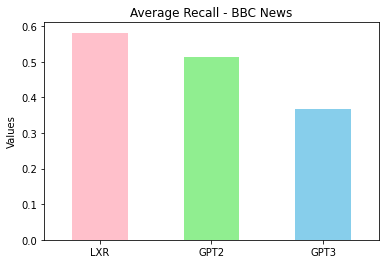

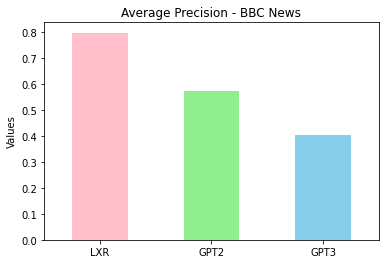

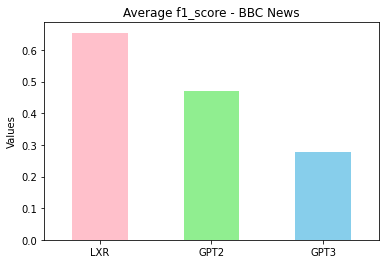

In [64]:
df['dictionary'] = ['LXR', 'GPT2', 'GPT3']
# Melt the DataFrame to reshape it for plotting
df_melted = pd.melt(df, id_vars=['dictionary'], value_vars=df.columns[:-1], var_name='key', value_name='value')
k = {'r':'Average Recall - BBC News', 'p':'Average Precision - BBC News', 'f':'Average f1_score - BBC News'}

# Iterate through unique keys and plot for each key
for key in df_melted['key'].unique():
    key_df = df_melted[df_melted['key'] == key]
    
    title = k[key]
    key_df.plot(kind='bar', x='dictionary', y='value', rot=0, legend=False, color=['pink', 'lightgreen', 'skyblue'])
    # Set labels and title
    plt.xlabel('')
    plt.ylabel('Values')
    plt.title(f'{title}')
    
    # Display the plot
    plt.show()


In [65]:
def variance_dict(diction):
    var_dict = {'rouge-1': {'r': 0, 'p': 0, 'f': 0}, 'rouge-2': {'r': 0, 'p': 0, 'f': 0}, 'rouge-l': {'r': 0, 'p': 0, 'f': 0}}

    var_dict['rouge-1']['r'] = statistics.variance(diction['rouge-1']['r'])
    var_dict['rouge-1']['p'] = statistics.variance(diction['rouge-1']['p'])
    var_dict['rouge-1']['f'] = statistics.variance(diction['rouge-1']['f'])

    var_dict['rouge-2']['r'] = statistics.variance(diction['rouge-2']['r'])
    var_dict['rouge-2']['p'] = statistics.variance(diction['rouge-2']['p'])
    var_dict['rouge-2']['f'] = statistics.variance(diction['rouge-2']['f'])

    var_dict['rouge-l']['r'] = statistics.variance(diction['rouge-l']['r'])
    var_dict['rouge-l']['p'] = statistics.variance(diction['rouge-l']['p'])
    var_dict['rouge-l']['f'] = statistics.variance(diction['rouge-l']['f'])
    
    return var_dict

In [66]:
var_lxr, var_gpt2, var_gpt3 = variance_dict(scores_lxr), variance_dict(scores_gpt2), variance_dict(scores_gpt3)

print(var_lxr, '\n\n\n', var_gpt2, '\n\n\n', var_gpt3)

{'rouge-1': {'r': 0.03135241107262382, 'p': 0.02400697478686458, 'f': 0.021599664787539198}, 'rouge-2': {'r': 0.03618066520178175, 'p': 0.033924413971630187, 'f': 0.028366155308027007}, 'rouge-l': {'r': 0.03182780886494161, 'p': 0.025229455940988757, 'f': 0.022380502595784398}} 


 {'rouge-1': {'r': 0.03046227122174584, 'p': 0.01925950489992815, 'f': 0.017797698341015886}, 'rouge-2': {'r': 0.03641950780150198, 'p': 0.025857785869233457, 'f': 0.02467567774873205}, 'rouge-l': {'r': 0.031251238641395014, 'p': 0.020099737559379938, 'f': 0.018763111132586576}} 


 {'rouge-1': {'r': 0.01587279189794565, 'p': 0.013482426894034201, 'f': 0.009829754508976113}, 'rouge-2': {'r': 0.01587941292526002, 'p': 0.013464504447319978, 'f': 0.011229627421861685}, 'rouge-l': {'r': 0.016508339124096983, 'p': 0.013775424323642413, 'f': 0.01050164344760366}}


In [67]:
def variance_rouge(diction):
    var_rouge = {'r': 0, 'p': 0, 'f': 0}
    
    var_rouge['r'] = (diction['rouge-1']['r']+diction['rouge-2']['r']+diction['rouge-l']['r'])/3
    var_rouge['p'] = (diction['rouge-1']['p']+diction['rouge-2']['p']+diction['rouge-l']['p'])/3
    var_rouge['f'] = (diction['rouge-1']['f']+diction['rouge-2']['f']+diction['rouge-l']['f'])/3
    return var_rouge

In [68]:
varmean_lxr, varmean_gpt2, varmean_gpt3 = variance_rouge(var_lxr), variance_rouge(var_gpt2), variance_rouge(var_gpt3)

print(varmean_lxr, varmean_gpt2, varmean_gpt3)

{'r': 0.03312029504644906, 'p': 0.027720281566494507, 'f': 0.02411544089711687} {'r': 0.032711005888214274, 'p': 0.02173900944284718, 'f': 0.02041216240744484} {'r': 0.01608684798243422, 'p': 0.013574118554998864, 'f': 0.010520341792813819}


In [69]:
# Create a DataFrame from the dictionaries
df = pd.DataFrame([varmean_lxr, varmean_gpt2, varmean_gpt3])

# Display the DataFrame
print(df)

          r         p         f
0  0.033120  0.027720  0.024115
1  0.032711  0.021739  0.020412
2  0.016087  0.013574  0.010520


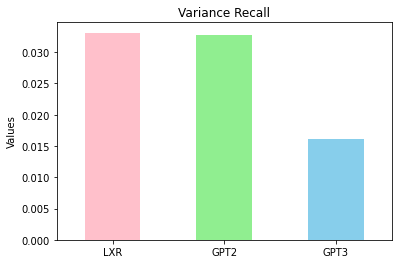

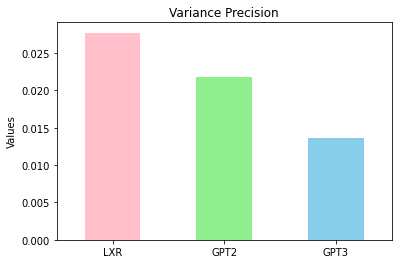

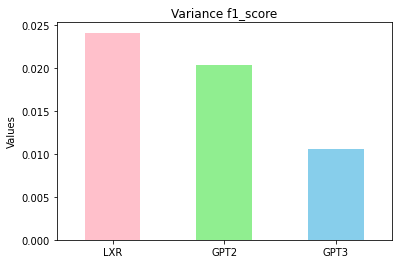

In [70]:
df['dictionary'] = ['LXR', 'GPT2', 'GPT3']
# Melt the DataFrame to reshape it for plotting
df_melted = pd.melt(df, id_vars=['dictionary'], value_vars=df.columns[:-1], var_name='key', value_name='value')
k = {'r':'Variance Recall', 'p':'Variance Precision', 'f':'Variance f1_score'}

# Iterate through unique keys and plot for each key
for key in df_melted['key'].unique():
    key_df = df_melted[df_melted['key'] == key]
    
    title = k[key]
    key_df.plot(kind='bar', x='dictionary', y='value', rot=0, legend=False, color=['pink', 'lightgreen', 'skyblue'])
    # Set labels and title
    plt.xlabel('')
    plt.ylabel('Values')
    plt.title(f'{title}')
    
    # Display the plot
    plt.show()


 # Time Analysis

In [34]:
import pickle

def get_list(name):
    # Open the file in binary read mode
    with open(name, 'rb') as file:
        # Use pickle.load to load the list from the file
        my_list = pickle.load(file)

        # Now, 'my_list' contains the data loaded from the pickle file
    return my_list

lxr_time, GPT2_time, GPT3_time = get_list('lxr_times.pkl'), get_list('GPT2_times.pkl'), get_list('GPT3_times.pkl')


In [39]:
print("LexRank average summarization time is :", np.mean(lxr_time))
print("GPT2 average summarization time is :", np.mean(GPT2_time))
print("GPT3 average summarization time is :", np.mean(GPT3_time))


LexRank average summarization time is : 0.011955588817596436
GPT2 average summarization time is : 0.7585849785804748
GPT3 average summarization time is : 0.6666714696884155


# Summaries Example

In [40]:
import pickle

def get_list(name):
    # Open the file in binary read mode
    with open(name, 'rb') as file:
        # Use pickle.load to load the list from the file
        my_list = pickle.load(file)

        # Now, 'my_list' contains the data loaded from the pickle file
    return my_list

lxr_summary, GPT2_summary, GPT3_summary = get_list('lxr_summaries.pkl'), get_list('GPT2_summaries.pkl'), get_list('GPT3_summaries.pkl')


In [48]:
print("LexRank summary is :\n", lxr_summary[0], '\n\n\n'"GPT2 summary is :\n", GPT2_summary[0], "\n\n\n""GPT3 summary is :\n", GPT3_summary[0], "\n\n\n""Real summary is:\n",
     news_summary_list[0])


LexRank summary is :
 Dame Julie pops in to see Poppins

Mary Poppins star Dame Julie Andrews watched the hit stage version of her classic film at a charity performance in London's West End.But Kelly said she was "very nervous" about meeting Dame Julie because she was "my absolute hero".It was the first time Dame Julie, who shot to fame as the nanny in the 1964 Disney movie, had seen the musical, staged at the Prince Edward Theatre.The gala performance saw Dame Julie, 69, return to the theatre where she had her first starring role in a performance of Humpty Dumpty in 1948. 


GPT2 summary is :
 summarize: Dame Julie pops in to see Poppins

Mary Poppins star Dame Julie Andrews watched the hit stage version of her classic film at a charity performance in London's West End.

It was the first time Dame Julie, who shot to fame as the nanny in the 1964 Disney movie, had seen the musical, staged at the Prince Edward Theatre. She watched Laura Michelle Kelly, 23, reprise the role on stage. The

In [73]:
print(scores_gpt3['rouge-1']['r'][0])
print(scores_gpt3['rouge-1']['p'][0])
print(scores_gpt3['rouge-1']['f'][0])

0.5441176470588235
0.4065934065934066
0.4654088001360706


In [47]:
print("LexRank summary is :\n", lxr_summary[23], '\n\n\n'"GPT2 summary is :\n", GPT2_summary[23], "\n\n\n""GPT3 summary is :\n", GPT3_summary[23], "\n\n\n""Real summary is:\n",
     news_summary_list[23])


LexRank summary is :
 The fourth series of the show peaked on Monday at 11.9m and 49.2% of the audience, just before Joe Pasquale won.Pasquale follows Kerry McFadden, Phil Tufnell and Tony Blackburn as winners of the show.Singer and TV presenter McFadden was the show's first female winner.This compared with a peak of 15.3m at and a record 62.2% of the TV audience when Kerry McFadden won in February. 


GPT2 summary is :
 summarize: Jungle TV show ratings drop by 4m

The finale of ITV1's I'm a Celebrity... Get Me Out of Here drew an average of 10.9m viewers - about four million fewer than the previous series.

The fourth series of the show peaked on Monday at 11.9m and 49.2% of the audience, just before Joe Pasquale won. This compared with a peak of 15.3m at and a record 62.2% of the TV audience when Kerry McFadden won in February. Comic Pasquale beat former Royal butler Paul Burrell who came second, nightclub owner Fran Cosgrave, who was third. Pasquale follows Kerry McFadden, Phil Tuf

In [76]:
print(scores_gpt3['rouge-1']['r'][23])
print(scores_gpt3['rouge-1']['p'][23])
print(scores_gpt3['rouge-1']['f'][23])
print('\n\n\n')
print(scores_gpt2['rouge-1']['r'][23])
print(scores_gpt2['rouge-1']['p'][23])
print(scores_gpt2['rouge-1']['f'][23])

0.3516483516483517
0.38095238095238093
0.36571428072228573




0.5054945054945055
0.5542168674698795
0.5287356271944775


# BertScore

In [14]:
from bert_score import score

hypotheses = ["A brown fox jumps over a dog"]
references = ["A quick brown dog jumps over the lazy fox"]
P, R, F1 = score(hypotheses, references, model_type = 'roberta-large')

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [48]:
berts_lxr = {'r': [], 'p': [], 'f': []}
berts_gpt2= {'r': [], 'p': [], 'f': []}
berts_gpt3= {'r': [], 'p': [], 'f': []}

summary = news_summary_list[0].split('.')



lxr_s = lxr_summary[0].split('.')
gpt2_s = GPT2_summary[0].split('.')
gpt3_s = GPT3_summary[0].split('.')
print(len(lxr_s), len(gpt2_s), len(gpt3_s))


summary.append('')
lxr_s.append('')
# print(gpt2_s, "\n\n\n", summary)

bert_lxr = score(lxr_s, summary, lang='en')
bert_gpt2 = score(gpt2_s, summary, lang='en')
bert_gpt3 = score(gpt3_s, summary, lang='en')

print(bert_lxr, "\n\n\n", bert_gpt2, "\n\n\n", bert_gpt3)



5 6 6


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


(tensor([0.8138, 0.8390, 1.0000, 1.0000, 0.0000, 0.0000]), tensor([0.8315, 0.8198, 1.0000, 1.0000, 0.0000, 0.0000]), tensor([0.8226, 0.8293, 1.0000, 1.0000, 0.0000, 0.0000])) 


 (tensor([0.8115, 0.8581, 0.8677, 0.8395, 0.0000, 0.0000]), tensor([0.8251, 0.8499, 0.8475, 0.8443, 0.0000, 0.0000]), tensor([0.8182, 0.8540, 0.8575, 0.8419, 0.0000, 0.0000])) 


 (tensor([0.7995, 0.8337, 0.8438, 0.8278, 0.0000, 0.0000]), tensor([0.8273, 0.8428, 0.8430, 0.8404, 0.0000, 0.0000]), tensor([0.8131, 0.8382, 0.8434, 0.8340, 0.0000, 0.0000]))


In [63]:
axis = 0

# Calculate mean along the specified axis
tlxr = torch.stack(bert_lxr, dim=1)
mean_bert_lxr  = torch.mean(tlxr, axis=0)

# Print the mean values
print("Bert lxr score"":", mean_bert_lxr)

# Calculate mean along the specified axis
tgpt2 = torch.stack(bert_gpt2, dim=1)
mean_bert_gpt2  = torch.mean(tgpt2, axis=0)

# Print the mean values
print("Bert gpt2 score"":", mean_bert_gpt2)

# Calculate mean along the specified axis
tgpt3 = torch.stack(bert_gpt3, dim=1)
mean_bert_gpt3  = torch.mean(tgpt3, axis=0)

# Print the mean values
print("Bert gpt3 score"":", mean_bert_gpt3)

Bert lxr score: tensor([0.6088, 0.6085, 0.6086])
Bert gpt2 score: tensor([0.5628, 0.5611, 0.5619])
Bert gpt3 score: tensor([0.5508, 0.5589, 0.5548])
